Flight Price Prediction

Burak Balkanlı - 18070001039
Gülce Simay Nurlu - 18070001018
Engincan Ciğeroğlu - 18070001022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv('./Clean_Dataset.csv')

In [3]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data = data.drop('Unnamed: 0',axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
data.isna().any()

airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

In [7]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


- Number of flights operating per each airline (Vistara is operating most of the routes)

In [8]:
data['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

- Variation of prices across the airlines

In [9]:
price_by_airline = data.groupby('airline').mean()['price']
airline = [i for i,df in data.groupby('airline')]
px.bar(x = airline,y=price_by_airline,color=price_by_airline,width=800,height=400,labels={
                     "x": "Airline",
                     "y": "Average Ticket Price"
                 })

/var/folders/2z/nnp0lyv93gz3f1xj8vk5hqm40000gn/T/ipykernel_51809/563788216.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_by_airline = data.groupby('airline').mean()['price']


- Difference between price of economy and business class

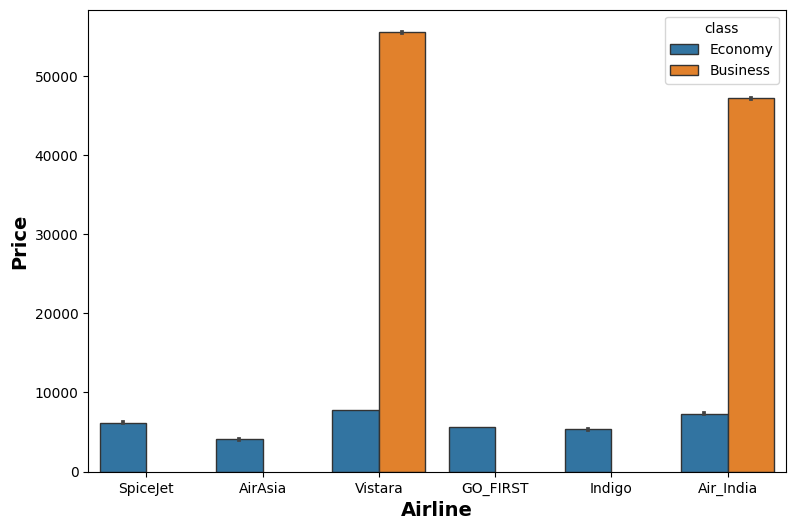

In [10]:
plt.figure(figsize=(9,6))
sns.barplot(x = 'airline',y='price',data = data,hue = 'class',edgecolor=".2")
plt.xlabel("Airline",fontweight='bold',size=14)
plt.ylabel("Price",fontweight='bold',size=14)
plt.show()

- Lets see which source city is more frequently served

In [11]:
count_by_source = data.groupby('source_city').count()['airline']
source_city = [i for i,df in data.groupby('source_city')]
px.pie(values = count_by_source,names=source_city,color_discrete_sequence=px.colors.sequential.dense,width=600,height=400)

- Lets see which destination city is more frequently served

In [12]:

count_by_source = data.groupby('destination_city').count()['airline']
destination_city = [i for i,df in data.groupby('destination_city')]
px.pie(values = count_by_source,names=destination_city,color_discrete_sequence=px.colors.sequential.deep,width=600,height=400)

- Which Route is the bussiest route (Top 5 most busy routes)
    - Delhi and bombay are most busiest airports

In [13]:
route = data.groupby(['source_city','destination_city']).count()['airline']
route = pd.DataFrame(route)
route = route.reset_index()
route.sort_values(by = 'airline',ascending=False).head()

,source_city,destination_city,airline
14,Delhi,Mumbai,15289
27,Mumbai,Delhi,14809
10,Delhi,Bangalore,14012
1,Bangalore,Delhi,13756
4,Bangalore,Mumbai,12939


- What are the times at which the cities are operating most of their flights

In [14]:
departure_time = data.groupby('departure_time').count()['airline']
cities = [i for i,df in data.groupby('departure_time')]
px.line(x = cities,y = departure_time,width=900,height=400,labels={'x':"Time of depdarture",'y':'Operating count'},markers=True)

- Individual cities and their operating times

In [15]:
cities = [i for i,df in data.groupby('source_city')]
fig = go.Figure()
for i in cities:
    values = data[data['source_city']==i]
    dep_time = [i for i,df in values.groupby('departure_time')]
    values = list(values.groupby('departure_time').count()['airline'].values)
    fig.add_trace(go.Scatter(
    x=dep_time,
    y=values,name = i))
fig.update_layout(
    width=1000,
    height=500,
    paper_bgcolor="LightSteelBlue",
)    
fig.show()    

 - Price of ticket based on time of departure

In [16]:
price_by_dep_time = data.groupby('departure_time').mean()['price']
dep_time = [i for i,df in data.groupby('departure_time')]
values = list(price_by_dep_time.values)
px.bar(x = dep_time,y = values,color = values,width=800,height=400,labels={
    "x" : "Departure Time",
    "y" : "Price"
})

/var/folders/2z/nnp0lyv93gz3f1xj8vk5hqm40000gn/T/ipykernel_51809/3230339365.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



- Lets consider a source and a destination and check which is the operator that is operating most number of services in that route
    - How does the source city affect the price
        - Delhi is the cheapest destination/Source to travel for/from and chennai is the most expensive place to reach or to travel from

In [17]:
fig = make_subplots(rows=1,cols=2)
source_city = list(data.groupby('source_city').mean()['price'].values)
source_cities = [i for i,df in data.groupby('source_city')]
destination_city = list(data.groupby('destination_city').mean()['price'].values)
destination_cities = [i for i,df in data.groupby('destination_city')]

fig.add_trace(go.Bar(y = source_city, x = source_cities,name = "source"),row=1,col=1)
fig.add_trace(go.Bar(y = destination_city, x = destination_cities,name = "destination"),row=1,col=2)

/var/folders/2z/nnp0lyv93gz3f1xj8vk5hqm40000gn/T/ipykernel_51809/3543247432.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/2z/nnp0lyv93gz3f1xj8vk5hqm40000gn/T/ipykernel_51809/3543247432.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



- How does the number of stops effect the price?

In [18]:
data['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

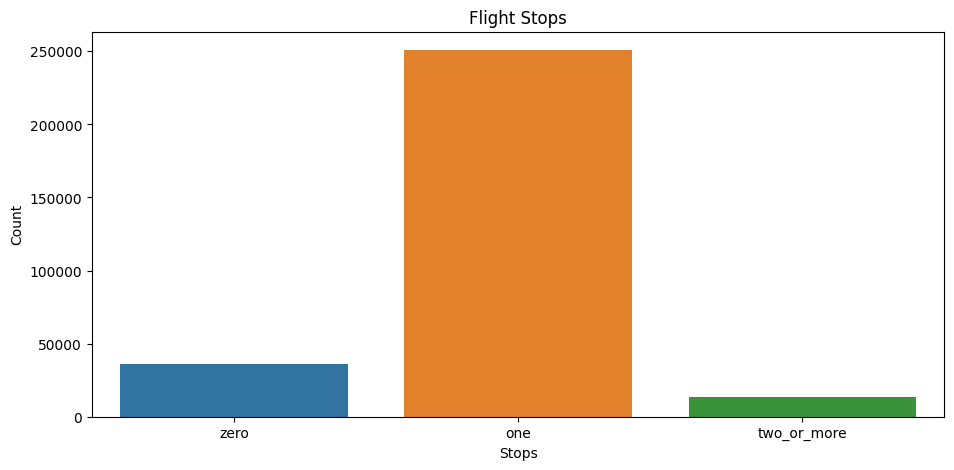

In [19]:
data_copy = data.copy()
plt.figure(figsize=(11,5))
sns.countplot(x = data_copy['stops'])
plt.title("Flight Stops")
plt.xlabel("Stops")
plt.ylabel("Count")
plt.show()

In [20]:
data_copy.groupby('stops').mean()
data_copy = data_copy.groupby(['stops','class']).mean().reset_index()
economy = data_copy[data_copy['class']=='Economy']
businesss = data_copy[data_copy['class']=='Business']
fig = make_subplots(rows=1,cols=2)
fig.add_trace(go.Bar(x = list(economy['stops']),y = economy['price']),row=1,col=1)
fig.add_trace(go.Bar(x = businesss['stops'],y = businesss['price']),row=1,col=2)

/var/folders/2z/nnp0lyv93gz3f1xj8vk5hqm40000gn/T/ipykernel_51809/3398448491.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/2z/nnp0lyv93gz3f1xj8vk5hqm40000gn/T/ipykernel_51809/3398448491.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



- Lets see how the number of days left affect the price

In [21]:
price = list(data.groupby('days_left').mean()['price'].values)
days = [i for i,df in data.groupby('days_left')]
px.scatter(x = days,y = price,color=price,labels = {
    'x':'Days Left for Departure',
    'y':'Price'})

/var/folders/2z/nnp0lyv93gz3f1xj8vk5hqm40000gn/T/ipykernel_51809/4220883514.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



- To get some stable obesrvations lets check the relation when the days left are at least 20

In [22]:
data_copy = data[data['days_left']>20]
values = list(data_copy.groupby('duration').mean()['price'].values)
duration = [i for i,df in data_copy.groupby('duration')]
px.scatter(x = duration,y = values,color=duration,title="Duration vs Price (When More Than 20 Days Left for Depature)",labels={
    "x" :  "Duration",
    "y" :  "Price"
})

/var/folders/2z/nnp0lyv93gz3f1xj8vk5hqm40000gn/T/ipykernel_51809/2993470573.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



- Does ticket price change based on the departure time and arrival time?

<Figure size 1800x600 with 0 Axes>

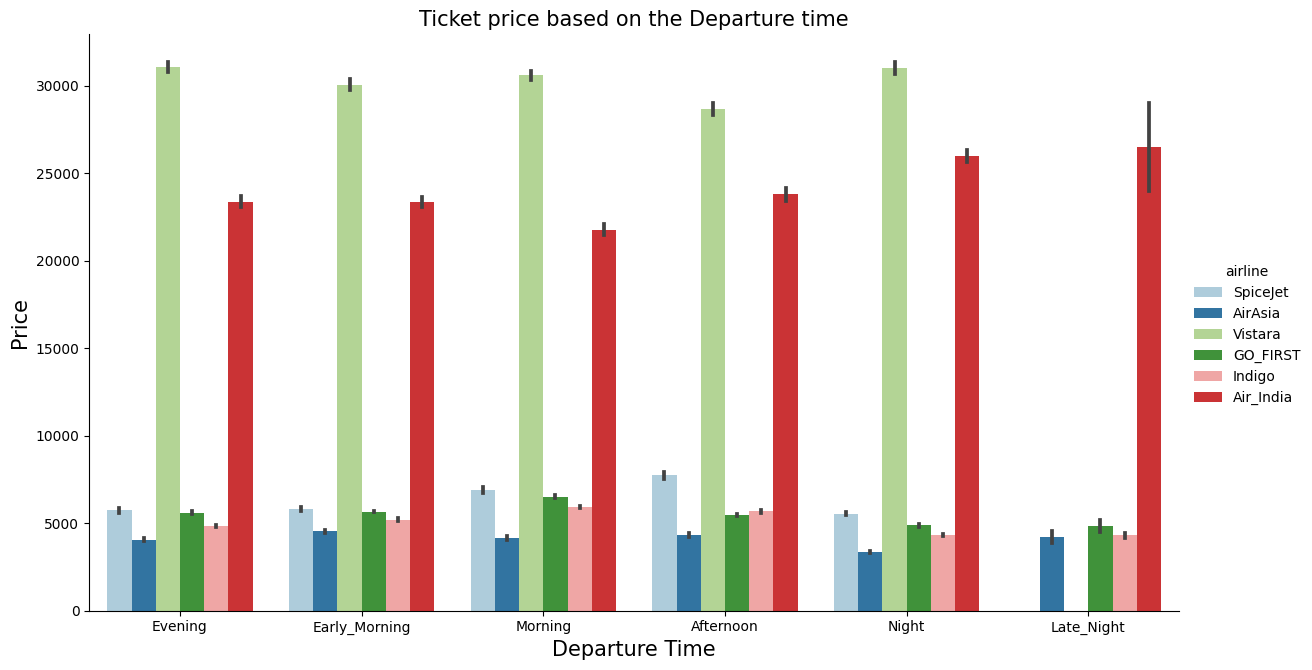

In [23]:
plt.figure(figsize=(18,6))
sns.catplot(data=data, kind="bar", x="departure_time", y="price", hue="airline", height=6.5, aspect=12/6.5 ,palette='Paired')
plt.title('Ticket price based on the Departure time',fontsize=15)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<Figure size 1800x600 with 0 Axes>

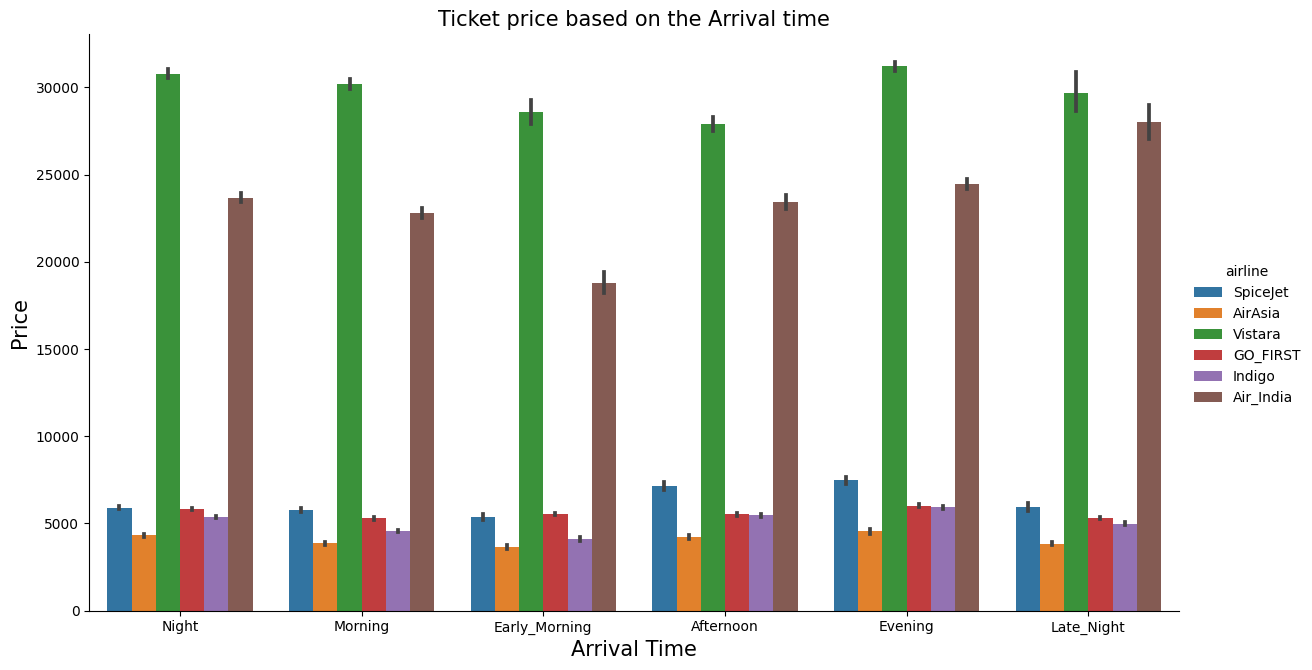

In [24]:
plt.figure(figsize=(18,6))
sns.catplot(data=data, kind="bar", x="arrival_time", y="price", hue="airline", height=6.5, aspect=12/6.5)
plt.title('Ticket price based on the Arrival time',fontsize=15)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

- We will be using the following regression algorithims

•	Linear regression 
•	K-Nearest Neighbors Regressor 
•	Gradient Boost Regressor 
•	XG Boost Regressor 
•	Random Forest Regressor 

In [25]:
final_data = data.copy()
final_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
for i in final_data.select_dtypes('object').columns:
    encoder = LabelEncoder()
    final_data[i] = encoder.fit_transform(data[i])

In [29]:
final_data.drop('flight',axis=1,inplace=True)

In [30]:
final_data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


- Train and test data split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('price',axis=1),final_data['price'], test_size=0.25, random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [38]:
models = {}

models["KNeighborsRegressor"]={"model":KNeighborsRegressor(n_neighbors=50)}
models["LinearRegression"]={"model":LinearRegression()}
models['GradientBoostingRegressor'] = {'model':GradientBoostingRegressor(n_estimators=50,max_depth=10)}
models["RandomForestRegressor"]={"model":RandomForestRegressor(n_estimators=50,max_depth=10)}
models["XGBRegressor"]={"model":xgb.XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)}

In [39]:
X = final_data.drop('price',axis=1)
y = final_data['price']

In [40]:
cv = KFold(n_splits=5)
for key,item in models.items():
    print('#############################################################################')
    reg_model = item['model']
    print(item['model'])
    score = cross_val_score(estimator=reg_model,X = X,y = y,cv=cv,scoring='r2')
    print(score)

    reg_model.fit(X_train,y_train)

    predicted = reg_model.predict(X_test)
    print('Some predicted values= ',predicted)
    

    actual_values = y_test.values
    print('Some actual values= ',actual_values)
    

    print('Mean Absolute Error =' , mean_absolute_error(actual_values,predicted))

    print('Mean Squarred Error =' , np.sqrt(mean_squared_error(y_test, predicted))) 

    print('Score = ' ,reg_model.score(X_test,y_test))

    print('#############################################################################')

#############################################################################
KNeighborsRegressor(n_neighbors=50)
[-2.10774272e+01 -3.51012751e+01 -3.31751438e+01 -2.40782432e-02
 -9.31753773e+00]
Some predicted values=  [ 5169.56 68198.06  6556.98 ...  6289.64 62004.06  4109.42]
Some actual values=  [ 7366 64831  6195 ...  5232 58315  2877]
Mean Absolute Error = 2541.1972358373646
Mean Squarred Error = 4372.537632716556
Score =  0.9629200594057555
#############################################################################
#############################################################################
LinearRegression()
[-0.2069986  -0.2036236  -0.15840652  0.83777416  0.07672315]
Some predicted values=  [ 4588.84313995 52832.3947172   7870.93341775 ...  8113.60969233
 56406.51175584   269.09517349]
Some actual values=  [ 7366 64831  6195 ...  5232 58315  2877]
Mean Absolute Error = 4624.722238536343
Mean Squarred Error = 7007.542325984992
Score =  0.9047635108490827
##################

In [41]:
reg_model.fit(X_train,y_train)
predicted = reg_model.predict(X_test)
predicted

array([ 5280.9243, 66956.695 ,  6874.797 , ...,  5035.9385, 59104.297 ,
        2819.551 ], dtype=float32)

In [42]:
actual_values = y_test.values
actual_values

array([ 7366, 64831,  6195, ...,  5232, 58315,  2877])

In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [44]:
mean_absolute_error(actual_values,predicted)

1613.9221667769868

In [45]:
np.sqrt(mean_squared_error(y_test, predicted))

3029.65639270823

In [46]:
reg_model.score(X_test,y_test)

0.9821984151085972

In [48]:
final_model = xgb.XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)

In [49]:
final_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=5,
             num_parallel_tree=1, predictor='auto', random_state=1, ...)

In [50]:
final_model.score(X_test,y_test)

0.9821984151085972

In [51]:
#Final predictions
Predictions = final_model.predict(X_test)
Actual = y_test.values

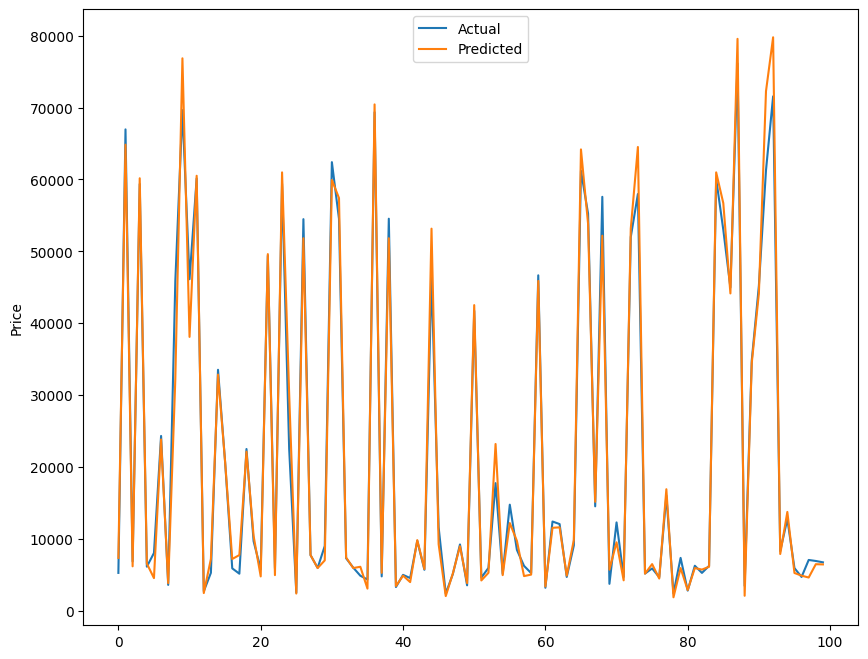

In [55]:
data_new = pd.DataFrame({"Y_test": Predictions , "Y_pred" : Actual})
# data_new.head(10)

plt.figure(figsize=(10,8))
plt.plot(data_new[:100])
plt.legend(["Actual" , "Predicted"])
plt.ylabel("Price")
plt.show()

<AxesSubplot: >

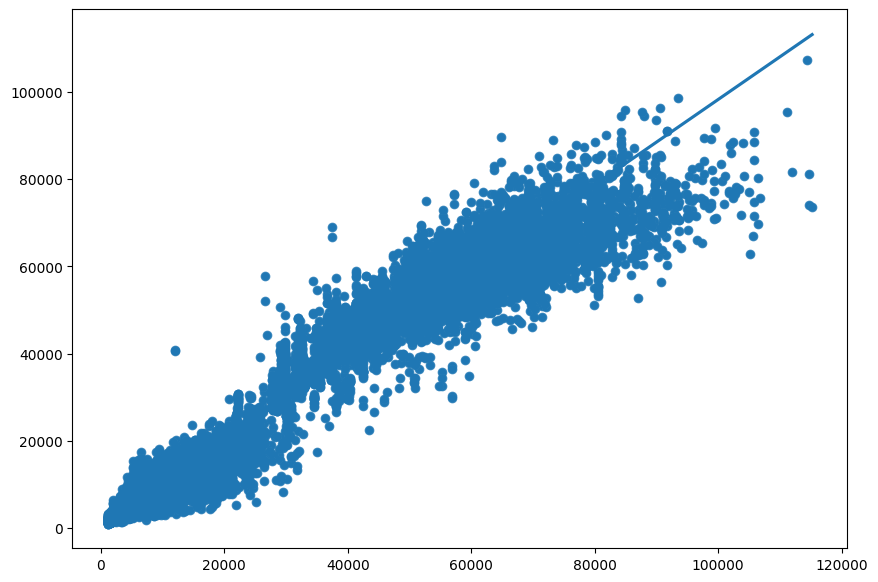

In [53]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = Actual,y = Predictions)
sns.regplot(x = Actual,y = Predictions)